![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png)

<h1>Pytorch Basics</h1>

<h2>Introduction</h2>
As we've seen we can use numpy to create single layer neural networks by calculating the gradients by hand and hard coding them and training them via GD. But what if we want to create larger and more complicated networks? What if we want to use complicated and fancy loss functions or use huge datasets and train with more complicated training regimes?! And what about training on GPUs.......<br>
That's a lot to try and work out EVERY time we want to try something new!! Lucky for us there are a number of Deep learning frameworks that can do much of the heavy lifting for us!<br>
For this unit we will be using Pytorch, a hugely powerful and widely used Deep Learning framework that lets us do all of the above and MORE

<h3> Importing the required libraries </h3>
Pytorch has two main modules, torch and torchvision<br>
torch contains most of the Deep Learning functionalities while torchvision contains many computer vision functions designed to work in hand with torch

In [2]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

<h3> The Pytorch Tensor </h3>
As we've already explored the "Tensor" is a useful concept and is very useful in Machine Learning, however you probably noticed in Numpy that our "Tensors" are called "Arrays", but now we are in Pytorch this is no more!!<br>
Let's do a recap of Numpy arrays and how similar they are to Pytorch tensors.

In [2]:
# Create some "Matrices" as lists of lists  

# 3x3
W = [[1, 1, 1],
     [1.5, 1.5, 1.5],
     [2, 2, 2]]

# 3x1
x = [[6], [7], [8]]
# 3x1
b = [[1], [1], [1]]

# Variable to store output
# 3x1
y = [[0], [0], [0]]

As we've seen before

In [3]:
# We can transform our list of lists into a "numpy array" by using the function "array"
W_np = np.array(W)

x_np = np.array(x)

# Lets use the function "ones" to create an array of ones!
b_np = np.ones((3, 1))

# Lets now compute Wx + b using these numpy variables!
output = np.matmul(W_np, x_np) + b_np

# Print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 [[22. ]
 [32.5]
 [43. ]]
Output shape:
 (3, 1)


Now in Pytorch!

In [5]:
# We can transform our list of lists into a "torch tensor" by using the function "FloatTensor"
# Note: here we've specified the datatype of the tensor, a 32bit "float" you can also just use the function "tensor"
# But this will inherit the datatype of the array given, to ensure the data-types are the same
# (and we can perform the wanted operations) we use "FloatTensor"

W_torch = torch.FloatTensor(W) #So we include "Float" because we want to ensure what the datatype is

x_torch = torch.FloatTensor(x)
x_torch_new=torch.Tensor(x)
print("X Torch New:\n",x_torch_new)

# Lets use the function "ones" to create an array of ones!
b_torch = torch.ones(3, 1)

# Lets now compute Wx + b using these numpy variables!
output = torch.matmul(W_torch, x_torch) + b_torch

# Print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

X Torch New:
 tensor([[6.],
        [7.],
        [8.]])
Output:
 tensor([[22.0000],
        [32.5000],
        [43.0000]])
Output shape:
 torch.Size([3, 1])


Wow! Numpy and Pytorch are remarkably similar, though this is no coincidence! The creators of Pytorch did this intentionally to make it easy to transfer existing skills in Numpy (a Python library that everyone uses - has its origins back in 1995!!) to Pytorch. To aid this transfer there are even functions that can transfer Pytorch tensors to Numpy arrays and back!

In [ ]:
# Create a random Numpy array
np_array = np.random.random((3, 4))
print("Numpy array:\n", np_array)

# Convert to Pytorch tensor
torch_tensor = torch.FloatTensor(np_array)
print("Pytorch tensor:\n", torch_tensor)

# Convert back to a Numpy array!
np_array2 = torch_tensor.numpy()
print("Numpy array:\n", np_array2)

<h>

<h1>On to Pytorch!</h1>
Let's further explore Pytorch and it's similarities to Numpy and then see what new functionalities it brings to the table!!
<h3> Basic Element-wise Operations </h3>
Let's quickly go back over some basics using Pytorch

In [6]:
# Lets create a 2D Tensor using torch.rand
y = torch.rand(4, 5)
# This will create a "Vector" of numbers from 0 to 1
print("Our 1D Tensor:\n",y)

# We can perform normal python scalar arithmetic on Torch tensors
print("\nScalar Multiplication:\n",y * 10)
print("Addition and Square:\n",(y + 1)**2)
print("Addition:\n",y + y)
print("Addition and division:\n",y / (y + 1))

# We can use a combination of Torch functions and normal python arithmetic
print("\nPower and square root:\n",torch.sqrt(y**2))

# Torch tensors are objects and have functions
print("\nY -\n Min:%.2f\n Max:%.2f\n Standard Deviation:%.2f\n Sum:%.2f" %(y.min(), y.max(), y.std(), y.sum()))

Our 1D Tensor:
 tensor([[0.9136, 0.9269, 0.3573, 0.2204, 0.3226],
        [0.1383, 0.5942, 0.0588, 0.0924, 0.2731],
        [0.5651, 0.1767, 0.3429, 0.0381, 0.6591],
        [0.7101, 0.0698, 0.4843, 0.6348, 0.9124]])

Scalar Multiplication:
 tensor([[9.1357, 9.2690, 3.5728, 2.2043, 3.2262],
        [1.3827, 5.9419, 0.5881, 0.9242, 2.7310],
        [5.6514, 1.7667, 3.4290, 0.3815, 6.5914],
        [7.1005, 0.6981, 4.8430, 6.3478, 9.1242]])
Addition and Square:
 tensor([[3.6617, 3.7129, 1.8422, 1.4894, 1.7493],
        [1.2956, 2.5414, 1.1211, 1.1934, 1.6208],
        [2.4497, 1.3846, 1.8034, 1.0778, 2.7528],
        [2.9243, 1.1445, 2.2031, 2.6725, 3.6573]])
Addition:
 tensor([[1.8271, 1.8538, 0.7146, 0.4409, 0.6452],
        [0.2765, 1.1884, 0.1176, 0.1848, 0.5462],
        [1.1303, 0.3533, 0.6858, 0.0763, 1.3183],
        [1.4201, 0.1396, 0.9686, 1.2696, 1.8248]])
Addition and division:
 tensor([[0.4774, 0.4810, 0.2632, 0.1806, 0.2439],
        [0.1215, 0.3727, 0.0555, 0.0846, 0.2145]

<h3>Tensor Opperations</h3>

In [7]:
# Create two 3D Tensors
tensor_1 = torch.rand(3,3,3) #The first dim (3) is the batch dimension
tensor_2 = torch.rand(3,3,3)

# Add the 2 Tensors
print("Addition:\n",tensor_1 + tensor_2)

# We cannot perform a normal "matrix" multiplication on a 3D tensor
# But we can treat the 3D tensor as a "batch" (like a stack) of 2D tensors
# And perform normal matrix multiplication independantly on each pair of 2D matricies
print("Batch Multiplication:\n", torch.bmm(tensor_1, tensor_2)) #Batch multiplications allow us to perform matrix multiplications in parallel

Addition:
 tensor([[[1.1479, 1.6573, 1.1094],
         [1.6610, 0.6478, 0.9447],
         [0.3364, 0.7751, 0.5732]],

        [[0.9982, 0.1711, 0.7701],
         [0.9551, 1.2359, 0.7112],
         [1.2103, 0.5247, 0.3596]],

        [[1.2960, 1.1483, 0.9568],
         [1.0058, 0.6123, 0.7498],
         [0.7418, 0.5084, 0.9968]]])
Batch Multiplication:
 tensor([[[1.0145, 0.9656, 0.7320],
         [1.2640, 1.3863, 0.8835],
         [0.0920, 0.1635, 0.0905]],

        [[0.5079, 0.1554, 0.2245],
         [0.8096, 0.4294, 0.2335],
         [0.8300, 0.3733, 0.3338]],

        [[0.6590, 0.8301, 0.8032],
         [0.5010, 0.4532, 0.6927],
         [0.5138, 0.7149, 0.3305]]])


In [8]:
# Lets create a more interesting tensor
tensor_3 = torch.rand(2,4,5)
# We can swap the Tensor dimensions
print("\nThe origional Tensor is is:\n", tensor_3)
print("With shape:\n", tensor_3.shape)

# Tranpose will swap the dimensions it is given
print("The Re-arranged is:\n", tensor_3.transpose(0,2))
print("With shape:\n", tensor_3.transpose(0,2).shape)


The origional Tensor is is:
 tensor([[[0.0218, 0.3102, 0.1195, 0.9973, 0.4712],
         [0.6509, 0.5651, 0.2132, 0.7777, 0.2639],
         [0.5298, 0.5698, 0.2961, 0.2321, 0.2802],
         [0.7276, 0.9174, 0.2649, 0.6843, 0.2150]],

        [[0.2314, 0.4452, 0.6736, 0.1830, 0.7799],
         [0.8639, 0.4344, 0.1853, 0.0520, 0.8100],
         [0.4377, 0.8217, 0.8497, 0.3896, 0.4817],
         [0.7445, 0.8400, 0.8469, 0.8372, 0.2163]]])
With shape:
 torch.Size([2, 4, 5])
The Re-arranged is:
 tensor([[[0.0218, 0.2314],
         [0.6509, 0.8639],
         [0.5298, 0.4377],
         [0.7276, 0.7445]],

        [[0.3102, 0.4452],
         [0.5651, 0.4344],
         [0.5698, 0.8217],
         [0.9174, 0.8400]],

        [[0.1195, 0.6736],
         [0.2132, 0.1853],
         [0.2961, 0.8497],
         [0.2649, 0.8469]],

        [[0.9973, 0.1830],
         [0.7777, 0.0520],
         [0.2321, 0.3896],
         [0.6843, 0.8372]],

        [[0.4712, 0.7799],
         [0.2639, 0.8100],
        

<h3> Indexing </h3>
Indexing in Pytorch works the same as it does in Numpy, see if you can predict what values will be return by the indexing

In [10]:
# Create a 4D Tensor
tensor = torch.rand(2,3,1,4)
print("Our Tensor:\n",tensor)

# Select the last element of dim0
print("\nThe last element of dim0:\n",tensor[-1])

# 1st element of dim0
# 2nd element of dim1
print("\nIndexed elements:\n",tensor[0, 1])
 
# Select all elements of dim0
# The 2nd element of dim1
# The 1st element of dim2
# The 3rd element of dim3
print("\nIndexed elements:\n",tensor[:, 1, 0, 2])

Our Tensor:
 tensor([[[[0.1018, 0.8737, 0.0569, 0.7518]],

         [[0.7868, 0.1822, 0.1815, 0.0949]],

         [[0.3256, 0.3601, 0.2698, 0.7984]]],


        [[[0.8923, 0.6573, 0.0269, 0.7107]],

         [[0.0419, 0.6699, 0.9468, 0.9820]],

         [[0.8676, 0.8264, 0.2818, 0.6950]]]])

The last element of dim0:
 tensor([[[0.8923, 0.6573, 0.0269, 0.7107]],

        [[0.0419, 0.6699, 0.9468, 0.9820]],

        [[0.8676, 0.8264, 0.2818, 0.6950]]])

Indexed elements:
 tensor([[0.7868, 0.1822, 0.1815, 0.0949]])

Indexed elements:
 tensor([0.1815, 0.9468])


<h3> Describing Tensors </h3> <br>
Lets see how we can view the characteristics of our Tensors

In [11]:
# Lets create a large 4D Tensor
tensor = torch.rand(3, 5, 3, 2)

# View the Number of elements in every dimension
print("The Tensor's shape is:", tensor.shape)

# In Pytorch shape and size() do the same thing!
print("The Tensor's shape using size() is:", tensor.size())

# View the number of elements in total
print("There are %d elements in total:" % tensor.numel())

# View the number of Dimensions
print("There are %d Dimensions" %(tensor.ndim))

The Tensor's shape is: torch.Size([3, 5, 3, 2])
The Tensor's shape using size() is: torch.Size([3, 5, 3, 2])
There are 90 elements in total:
There are 4 Dimensions


<h3> Reshaping </h3> <br>
We can change a Tensor to one of the same size (same number of elements) but a different shape by using functions in a similar fashion to Numpy but with different functions!

In [12]:
# Let us reshape our Tensor to a 2D Tensor
print("Reshape to 3x30:\n", tensor.reshape(3, 30)) #When we re-shape, we flatten it out, and then we re-shape it (this is how it works under the hood)

# We can also use the Flatten method to convert to a 1D Tensor
print("Flatten to a 1D Tensor:\n",tensor.flatten())

# Here the -1 tells Pytorch to put as many elements as it needs here in order to maintain the given dimention sizes
# AKA "I don't care the size of this dimention as long as the first one is 10" 
print("Reshape to 10xwhatever:\n",tensor.reshape(10, -1)) #We just want 10 in the first dimenion, don't care about the second

Reshape to 3x30:
 tensor([[0.6359, 0.7637, 0.1883, 0.3622, 0.9604, 0.3419, 0.5462, 0.0431, 0.7863,
         0.0697, 0.3367, 0.9004, 0.8465, 0.6823, 0.6015, 0.7390, 0.7457, 0.1873,
         0.6046, 0.6382, 0.5490, 0.1905, 0.6409, 0.9469, 0.9342, 0.3540, 0.3322,
         0.8289, 0.9059, 0.0205],
        [0.9227, 0.1355, 0.8960, 0.1319, 0.8980, 0.4718, 0.8133, 0.0978, 0.5493,
         0.3727, 0.7223, 0.8840, 0.8692, 0.1757, 0.1201, 0.3722, 0.7760, 0.6289,
         0.0593, 0.7769, 0.8095, 0.0770, 0.9374, 0.7547, 0.7104, 0.0485, 0.7890,
         0.7041, 0.5542, 0.9961],
        [0.1567, 0.7104, 0.8380, 0.8104, 0.8513, 0.0768, 0.6028, 0.3631, 0.8206,
         0.2847, 0.2893, 0.4217, 0.4396, 0.3705, 0.7455, 0.3694, 0.0368, 0.6903,
         0.1744, 0.0521, 0.5179, 0.7469, 0.6550, 0.6755, 0.0020, 0.1882, 0.5279,
         0.8745, 0.2484, 0.1935]])
Flatten to a 1D Tensor:
 tensor([0.6359, 0.7637, 0.1883, 0.3622, 0.9604, 0.3419, 0.5462, 0.0431, 0.7863,
        0.0697, 0.3367, 0.9004, 0.8465, 0.682

<h4>Squeezing and Unsqueezing </h4>
A very common shape-changing operation is to add an "empty" dimension to ensure the shape (specifically the number of dimensions) of the tensor is correct for certain functions. <br>
For example, when we start using Pytorch Neural Network modules, we need to provide the input of the network with a "batch" dimension (we often pass multiple inputs to our network at once) even if we only pass 1 datapoint!

In [15]:
# Lets create a 2D Tensor
#An empty dimenion, it only has a single possible index (if we have a 3D tensor, but one is empty we only really need to provide 1 value)
tensor = torch.rand(3, 2)

# View the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim3:", tensor.unsqueeze(2).shape) #unsqueeze is adding the empty dimension

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim2:", tensor.unsqueeze(1).shape)

print("Add an empty dimenion to dim1:",tensor.unsqueeze(0).shape)
#Essentially the dimension we add is where it goes to in the new tensor

The Tensors shape is: torch.Size([3, 2])
Add an empty dimenson to dim3: torch.Size([3, 2, 1])
Add an empty dimenson to dim2: torch.Size([3, 1, 2])
Add an empty dimenion to dim1: torch.Size([1, 3, 2])


In [16]:
# Lets create a 4D Tensor with a few "empty" dimensions 
#If we squeeze a specific index, it gets rid of it. Only squeeze existing dimensions
tensor = torch.rand(1, 3, 1, 2)

# view the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim3:", tensor.squeeze(2).shape)

# squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim0:", tensor.squeeze(0).shape)

# If we don't specify a dimension, squeeze will remove ALL empty dimensions
print("Remove all empty dimensons:", tensor.squeeze().shape)

The Tensors shape is: torch.Size([1, 3, 1, 2])
Remove empty dimenson dim3: torch.Size([1, 3, 2])
Remove empty dimenson dim0: torch.Size([3, 1, 2])
Remove all empty dimensons: torch.Size([3, 2])


<h3> Broadcasting </h3>
Broadcasting also works in Pytorch!

In [17]:
# Lets create 2 differently shaped 4D Tensors (Matrices)
#Broadcasting allows us to do addition of tensors of different dimensions
tensor1 = torch.rand(1, 4, 3, 1)
tensor2 = torch.rand(3, 4, 1, 4)

print("Tensor 1 shape:\n", tensor1.shape)
print("Tensor 2 shape:\n", tensor2.shape)

tensor3 = tensor1 + tensor2

print("The resulting shape is:\n", tensor3.shape)

Tensor 1 shape:
 torch.Size([1, 4, 3, 1])
Tensor 2 shape:
 torch.Size([3, 4, 1, 4])
The resulting shape is:
 torch.Size([3, 4, 3, 4])


<h1> Pytorch Autograd </h1>
<h3>Lets see Numpy do this!</h3>
Now on to something that makes Pytorch (and other Deep Learning frameworks) unique, the auto-differentiable computational graphs! (don't worry about how this exactly works)<br>

Remember how we compute the gradients of parameters (weights) of a model by "backpropagation". First we calculate the "gradient" of the loss with respect to the model's output and then using the chain rule find the gradient of the loss with respect to the parameters or the input and on and on for larger networks. Seems like a pretty repetitive process governed by some well known rules right? Well you know what is good at doing repetitive well defined things?!?! Computers!!<br>

[Youtube - Backpropagation Main Ideas by StatQuest](https://www.youtube.com/watch?v=IN2XmBhILt4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=6)

[Youtube - What is backpropagation really doing? by 3Blue1Brown](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

[Blog - Yes you should understand backprop by Andrej Karpathy](https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b)

This "automatic" backpropagation (among other things) is what Pytorch REALLY gives us that makes training Neural Networks easy. So how does it do it? Well first Pytorch keeps track of everything we do!! (unless we tell it not to) It does this by forming a "computational graph" - a tree-like structure of all the operations we perform starting at some initial tensor. When we tell Pytorch to backpropagate from some point, it works backwards up this tree and calculates and stores the gradients with respect to the point from where we back propagated from.

Lets see an example of this!

In [19]:
# Lets create some tensors, requires_grad tells Pytorch we want to store the gradients for this tensor
# we need to do this if we are working with basic Pytorch tensors
x = torch.FloatTensor([4])
x.requires_grad = True #Store gradients of where we are backpropogating from with respect to this value
w = torch.FloatTensor([2])
w.requires_grad = True
b = torch.FloatTensor([3])
b.requires_grad = True

# By performing a simple computation Pytorch will build a computational graph.
y = w * x + b    # y = 2 * x + 3

# It's easy to see that
# dy/dx = w = 2
# dy/dw = x = 4
# dy/db = 1

# Compute gradients via Pytorch's Autograd
y.backward() #So essentially, we compute gradients going backwards from our current point to the variables we are computing gradients for

# Print out the calculated gradients
# These gradients are the gradients with respect to the point where we backprop'd from - y
# Create your own equation and use the auto backprop to see the partial derivatives!
print("Calculated Gradients") 
print("dy/dx", x.grad.item())    # x.grad = dy/dx = 2 
print("dy/dw", w.grad.item())    # w.grad = dy/dw = 4
print("dy/db", b.grad.item())   # b.grad = dy/db = 1  
# Note: .item() simply returns a 0D Tensor as a Python scalar
#If we break the computation graph, then it ruins the gradient tracking
#.item() removes the tensor from the computational graph

Calculated Gradients
dy/dx 2.0
dy/dw 4.0
dy/db 1.0


In [21]:
#Making my own equations to do auto-grad on
x=torch.FloatTensor([5])
x.requires_grad=True
y=torch.FloatTensor([1])
y.requires_grad=True
z=x**2+y*x

z.backward()
print("Calculated Gradients") 
print("dz/dx", x.grad.item())    # x.grad = dy/dx = 2 
print("dz/dy", y.grad.item())    # w.grad = dy/dw = 4

Calculated Gradients
dz/dx 11.0
dz/dy 5.0


<h3> Finding the minimum </h3>
We can use gradient decent to find the minimum of an equation

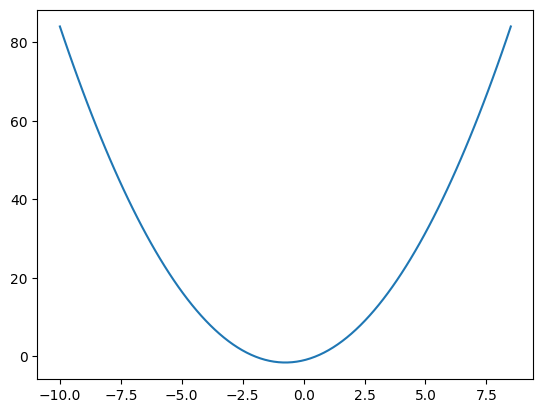

In [22]:
# Lets find the minimum of a parabola!

# Define the equation as a lambda function
fx = lambda  x: x**2 + 1.5 * x - 1 #Function of "x"

x = np.linspace(-10, 8.5, 100)

plt.plot(x, fx(x))

In [26]:
# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Lets use Pytorch's Autograd to find the gradient at this point
y_ = fx(x_) #pass it the point, and then take derivative at this point
y_.backward()

# The gradient tells us the direction to travel to increase Y
dy_dx_ = x_.grad.item()
print("dy/dx is %.2f when x is %.2f" % (dy_dx_, x_)) #Essentially, what happens to y when we increase x from the point?

dy/dx is -0.65 when x is -1.08


In [27]:
# Lets take some steps to decend the gradient!

# Create a random point X
x_ = torch.randn(1)
x_.requires_grad = True

# Create some loggers
x_logger = []
y_logger = []

# We'll keep track of how many steps we've done
counter = 0

# Set a scale for the step size
learning_rate = 0.01

# Initialise the gradient to a large value
dy_dx_ = 1000

# We'll limit the max number of steps so we don't create an infinite loop
max_num_steps = 1000

# Keep taking steps untill the gradient is small
while np.abs(dy_dx_) > 0.001:
    # Get the Y point at the current x value
    y_ = fx(x_)
    
    # Calculate the gradient at this point
    y_.backward()
    dy_dx_ = x_.grad.item()

    # Pytorch will not keep track of operations within a torch.no_grad() block
    # We don't want Pytorch to add our gradient decent step to the computational graph!
    with torch.no_grad(): #Critical to have a .no_grad() because we don't want the gradient descent to be added to the comp graph
        # Take a step down (decend) the curve
        x_ -= learning_rate * dy_dx_
        
        # Pytorch will accumulate the gradient over multiple backward passes
        # For our use case we don't want this to happen so we need to set it to zero
        # After we have used it
        x_.grad.zero_() #Making sure it is zero (None type) for next iteration
        
        # Log the X and Y points to plot
        x_logger.append(x_.item())
        y_logger.append(y_.item())
        
    counter += 1
    
    if counter == max_num_steps:
        break

print("Y minimum is %.2f and is when X = %.2f, found after %d steps" % (y_.item(), x_.item(), counter))

Y minimum is -1.56 and is when X = -0.75, found after 393 steps


<h1>Models and Optimizers</h1>

<h2>Pytorch nn.Module</h2>
In Pytorch the basic template for creating our models is the "Module" class within torch.nn. To create our own class we inherit this class as the "superclass" so that we have access to all the properties and functions. <br>
Lets create our own constructor of this class!

The two main functions we need to create are the <b>\__init__</b> and <b>forward</b> functions. We've already seen <b>\__init__</b> so lets looks at <b>forward</b><br>

The <b>forward</b> function is the only function that we MUST create when we build our class, Pytorch uses this fuction as the "entry point" to our model and is what is called when we do a forward pass of our model.


In [3]:
class SimpleFunction(nn.Module): #We inherit from the overall "module class"
    """
    Simple implementation of an nn.Module subclass
    Takes the input (x) and returns x * 4 + 2
    """
    def __init__(self): #This is where we define our layers
        # Pass our class and self to superclass and call the superclass's init function
        super(SimpleFunction, self).__init__() 
        
    def forward(self, x): #This is where we define the equation of our model (what thing will happen to input data). Essentially passes data through our model
        return x * 4 + 2

In [4]:
# Create an instance of our class
simple_function = SimpleFunction()
# Perform a "forward pass" of our class
output = simple_function(10)
print("Class output:", output)
# Note we do NOT need to explicitly call the .forward() function of our class,
# a forward pass of our models is such a common step that Pytorch makes it easier and cleaner for us to do

Class output: 42


<h3>A more complicated model </h3><br>
The previous nn.Module class that we created wasn't really a ML "model", lets create something that we've seen before; a simple linear model.

In [6]:
class LinearModel(nn.Module):
    """
    Takes the input (x) and returns x * w^t + b
    """
    def __init__(self, input_size, output_size):
        # Pass our class and self to superclass and call the superclass's init function
        super(LinearModel, self).__init__() #Essentially, initializes the superclass (the nn.module)

        # nn.Parameter wraps our normal tensors and "tells" Pytorch
        # that they are our nn.Module's model parameters to be optimized 

        #Not tensor it self, but we are treating these as parameters of our model
        self.w = nn.Parameter(torch.randn(output_size, input_size)) #Esentially another one of our weights. It is output_s x input_s
        self.b = nn.Parameter(torch.randn(1, output_size)) #One of our weights

    def forward(self, x):
        return torch.matmul(x,  self.w.t()) + self.b #multiply (output_s x input_s)*(input_s x output_s) + b

In [10]:
# Create a batch of 10 datapoints each 5D
input_data = torch.randn(10, 6) #We have 10 different batches of 6 points

# Create an instance of our Model
linear_model = LinearModel(6, 2) #Input size is 6, output size in 1

# Perform a forward pass!
output = linear_model(input_data)

print(output.shape)
print(output.detach())
# Note: detach "disconnects" the tensor and returns it with no history of previous calculations

torch.Size([10, 2])
tensor([[-0.0461,  2.5269],
        [-0.7074,  1.9751],
        [ 1.1799,  0.0909],
        [ 0.1320,  4.8636],
        [ 0.7680,  3.4097],
        [ 1.1411, -1.2076],
        [-0.7672,  2.9352],
        [ 0.9183,  0.9637],
        [ 0.1290,  1.1585],
        [ 0.2415,  3.3091]])


<h2>Pytorch inbuilt Neural Network Layers</h2>
The "Linear layer" is so common place that Pytorch already has an implementation of it, in fact Pytorch has implementations of most Layer types which act as building blocks for our multi-layer models. For now lets just see how we can implement Pytorch's linear layer (we will see may more layer types later in the semester!).<br>
<b>Things to know!</b><br>
- Pytorch initialises the weights and biases of it's layers in very particular ways (not just from a normal distribution!), usualy based off of deep learning research, see the documentation for more details.<br>
- Pytorch includes a bias term in it's layers by default.

In [ ]:
# Build a linear layer aka a "fully connected" layer aka a "Perceptron" layer
# nn.Linear(Number of inputs, Number of outputs) 
linear = nn.Linear(3, 1) 

# Lets have a look at the parameters of this layer
# The "weights" are what is multipied by the input data
print ('w:\n', linear.weight.data)
# The bias is then added on!
print ('b:\n', linear.bias.data)

print ('w shape:\n', linear.weight.data.shape)
print ('b shape:\n', linear.bias.data.shape)
# Note: .data just gives us the raw Tensor without any connection to the computational graph
# - it looks nicer when we print it out
# Note: The opperation the linear layer performs is y = x*A^t + b
# where A^t is the transpose of the weights and b is the bias,
# this opperation is also know as an "affine transformation"

In [ ]:
# Lets have a look at the gradients of these parameters
print ('w:\n', linear.weight.grad)
print ('b:\n', linear.bias.grad)
# Note: Pytorch initialises the grad of the tensors to "None" NOT 0!
# They only get created after the first backwards pass.

In [ ]:
# Create a random data input tensor
data = torch.randn(100, 3)
# Create some noisey target data
target = data.sum(1, keepdims=True) + 0.01*torch.randn(data.shape[0], 1)
print ('Input data:\n', data[:10])
print ('Output data:\n', target[:10])

Now that everything is set up, lets perform a "forward pass" of our model, aka let's put the data into the model and see what comes out.

In [ ]:
# Remember! To perform a forward pass of our model, we just need to "call" our network
# Pytorch's nn.Module class will automatically pass it to the "forward" function in the layer class
target_pred = linear(data)
print("Network output:\n", target_pred.data[:10])
print("Network output shape:", target_pred.shape)

<h3>Loss Functions and Optimizers</h3>
Now lets see how Pytorch helps us optimize our model!<br>
<b>Loss functions</b><br>
We've already seen loss function's before and defined our own, but using Pytorch we can pick from some pre-defined functions (we can also just create our own).

<b>Optimizers</b><br>
This is the object that will be doing the parameter updates for us! Pytorch has a number of different optimizers, some of which we will explore in future labs. For now we will just use our well known Gradient Descent (GD) optimizer.<br>
Note: Most optimizers are just some variant of GD

In [ ]:
# Lets perform a regression with a mean square error loss
loss_function = nn.MSELoss()

# Lets create a Stochastic gradient descent optimizer with a learning rate of 0.01
# (the way we will be using it, it is just normal GD) 
# When we create the optimizer we need to tell it WHAT it needs to optimize, so the first thing 
# We pass it are the linear layer's "parameters"
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) 

We can see from the following scatter plot that the outout of our model is NOT the same as our target data, let's see what the MSE loss is.

In [ ]:
# Plotting the first dimension of the input vs the output

# Use the outputs of the model from a few cells ago
plt.scatter(data[:, 0], target_pred.detach())
# Use the Ground Truth data
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth Data"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")

: 

In [ ]:
loss = loss_function(target_pred, target)
print('loss:', loss.item())

Lets perform a backward pass of our model to compute the gradients!

In [ ]:
# Backward pass.
loss.backward()
# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)
# Note for every backwards pass of the model we must first perform a forward pass
# as data from parts of the computational graph have been deleted upon the backward pass to save memory.
# We can tell Pytorch to hold onto this data, but, in many cases it needs to be recalculated anyway

Now, finally, tell the optimizer to perform an update step!

In [ ]:
# he critical step to update the parameter which reduce the loss
optimizer.step()

# Perform another forward pass of the model to check the new loss
target_pred = linear(data)
loss = loss_function(target_pred, target)
print('loss after 1 step optimization: ', loss.item())

<h3>The Training Loop</h3>
Our loss has gone down!! Lets see how low we can get it to go by constructing a training loop!<br>
For MOST tasks (but not all) a simgle training iteration in Pytorch can be summarised in the following 5 steps:<br>
- Forward pass of our model with the data.<br>
- Calculate the loss.<br>
- Reset the current stored gradients to 0<br>
- Backpropagate the loss to calculate the new gradients.<br>
- Perform an optimization step.<br>
<br>
We perform these steps over and over until our model has converged or some other point has been reached (depending on the application)

In [ ]:
# Lets create an empty array to log the loss
loss_logger = []

# Lets perform 100 itterations of our dataset
for i in range(1000):
    # Perform a forward pass of our data
    target_pred = linear(data)
    
    # Calculate the loss
    loss = loss_function(target_pred, target)
    
    # .zero_grad sets the stored gradients to 0
    # If we didn't do this they would be added to the 
    # Gradients from the previous step!
    optimizer.zero_grad()
    
    # Calculate the new gradients
    loss.backward()
    
    # Perform an optimization step!
    optimizer.step()

    loss_logger.append(loss.item())
    
print("loss:", loss.item())

Lets graph out the loss!

In [ ]:
plt.plot(loss_logger)

In [ ]:
# Plotting the first dimension of the input vs the output
plt.scatter(data[:, 0], target_pred.detach())
plt.scatter(data[:, 0], target, marker="x")
plt.legend(["Predictions", "Ground Truth"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")

<h2>Wohoo! We trained our first Pytorch neural network!!<h2>